Importing General Libraries and Loading Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
data=pd.read_csv("D:\Deep learning\practice\Churn_Modelling.csv")

In [3]:
X=data.iloc[:,3:-1].values
Y=data.iloc[:,-1].values

Data PreProcessing

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [5]:
le2=LabelEncoder()
X[:,1]=le.fit_transform(X[:,1])

Feature Scalling

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[:,:]=sc.fit_transform(X[:,:])

Splitting in Test and Train DataSets

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, random_state=0,test_size=0.2)

In [14]:
x_train=np.array(x_train)
y_train=np.array(y_train)

converting data type to float

In [26]:
x_train= np.asarray(x_train).astype(np.float_)
y_train= np.array(y_train).astype(np.float_)
x_test=np.array(x_test).astype(np.float_)
y_teat=np.array(y_test).astype(np.float_)

Importing TensorFlow and Building Artificial neural network

In [21]:
import tensorflow as tf

In [28]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
final_model=ann.fit(x_train,y_train,batch_size=30,epochs=50)


Epoch 1/50
267/267 [==============================] - 1s 2ms/step - loss: 0.5898 - accuracy: 0.7240
Epoch 2/50
267/267 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8001
Epoch 3/50
267/267 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8037
Epoch 4/50
267/267 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8096
Epoch 5/50
267/267 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8150
Epoch 6/50
267/267 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8238
Epoch 7/50
267/267 [==============================] - 1s 2ms/step - loss: 0.3961 - accuracy: 0.8316
Epoch 8/50
267/267 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8391
Epoch 9/50
267/267 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8444
Epoch 10/50
267/267 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8459

In [29]:
final_model.history.keys()

dict_keys(['loss', 'accuracy'])

Plotting Accuracy and Loss per epochs

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

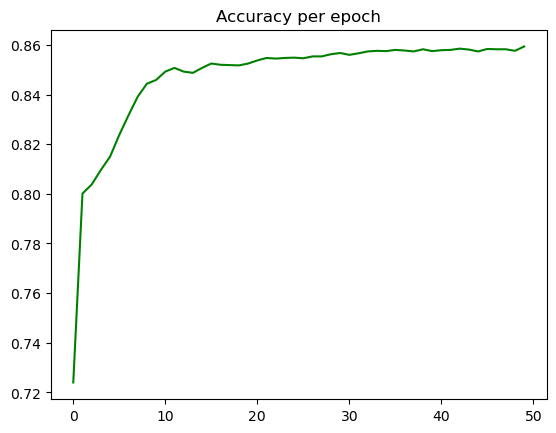

In [64]:
plt.plot(final_model.history['accuracy'],color='green')
plt.title('Accuracy per epoch')
plt.ylabel=('Accuracy')
plt.xlabel=('Epochs')
plt.plot

[]

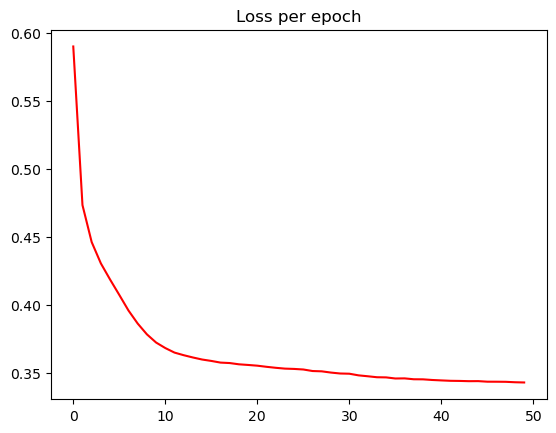

In [62]:
plt.plot(final_model.history['loss'],color='red')
plt.title('Loss per epoch')
plt.xlabel=('Epochs')
plt.ylabel=('Loss')
plt.plot()

Predicting test results

In [43]:
y_pred=ann.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [45]:
y_pred=(y_pred>0.5)

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1541,   54],
       [ 221,  184]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8625